In [9]:
import datashader as ds
import datashader.transfer_functions as tf
import pandas as pd
from random import *
import json
from bokeh.plotting import figure, output_file, show
from bokeh.io import export_png
from PIL import Image
from bokeh.models import Label
import os

In [10]:
x_range = (1345920.00, 2099400.00)
y_range = (6199150.00, 6631150.00)

delsi = 2000

In [11]:
jmena = pd.read_csv('./scratch/mesta.csv')

In [12]:
omit = [
    'Karviná',
    'Havířov',
    'Teplice'
]

In [13]:
zemak = pd.read_csv('./scratch/zeman.csv')
prof = pd.read_csv('./scratch/drahos.csv')
zeman['win'] = - 1
drahos['win'] = 1
df = zeman.append(drahos)

dfr = df.groupby(['x', 'y']).win.sum().reset_index()
dfr.reset_index(inplace=True)

cvs = ds.Canvas(plot_width=delsi, plot_height=int(delsi/1.74), x_range=x_range, y_range=y_range)
agg = cvs.points(dfr, 'x', 'y', ds.mean('win'))
img = tf.shade(agg, cmap=['#ca0020', '#0571b0'], how='log')

p = figure(plot_width=delsi, plot_height=int(delsi/1.74), x_range=x_range, y_range=y_range, outline_line_color=None,
min_border=0, min_border_left=0, min_border_right=0,
min_border_top=0, min_border_bottom=0, background_fill_color=None, border_fill_color=None)

p.xaxis.visible = False
p.yaxis.visible = False
p.xgrid.visible = False
p.ygrid.visible = False
p.toolbar.logo = None
p.toolbar_location = None

for row in jmena.iterrows():
    x = row[1]['X']
    y = row[1]['Y']
    nm = row[1]['NAZ_OBEC']
    if nm in omit:
        continue
    #p.circle([x], [y], size=20, color="yellow", alpha=0.5)
    lab = Label(x=x, y=y,text=nm, render_mode='canvas',
                text_color='black',
                text_font_size = "15pt",
                text_align='center',
                #text_alpha=1,
                border_line_alpha = 0.8,
                #border_line_color='white',
                #border_line_cap = 'round',
                #border_line_join='round',
                #border_line_width='6pt',
                text_font_style='bold',
                background_fill_color='white',
                background_fill_alpha=0.8
               )
    p.add_layout(lab)

In [14]:
export_png(p, filename='lab.png')

W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure(id='816ef75d-ad4b-4fa3-b1e0-a8498f9ae5bb', ...)
C:\Users\datastory\Anaconda3\lib\site-packages\selenium\webdriver\phantomjs\webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


'C:\\DEVEL\\dot-map\\lab.png'

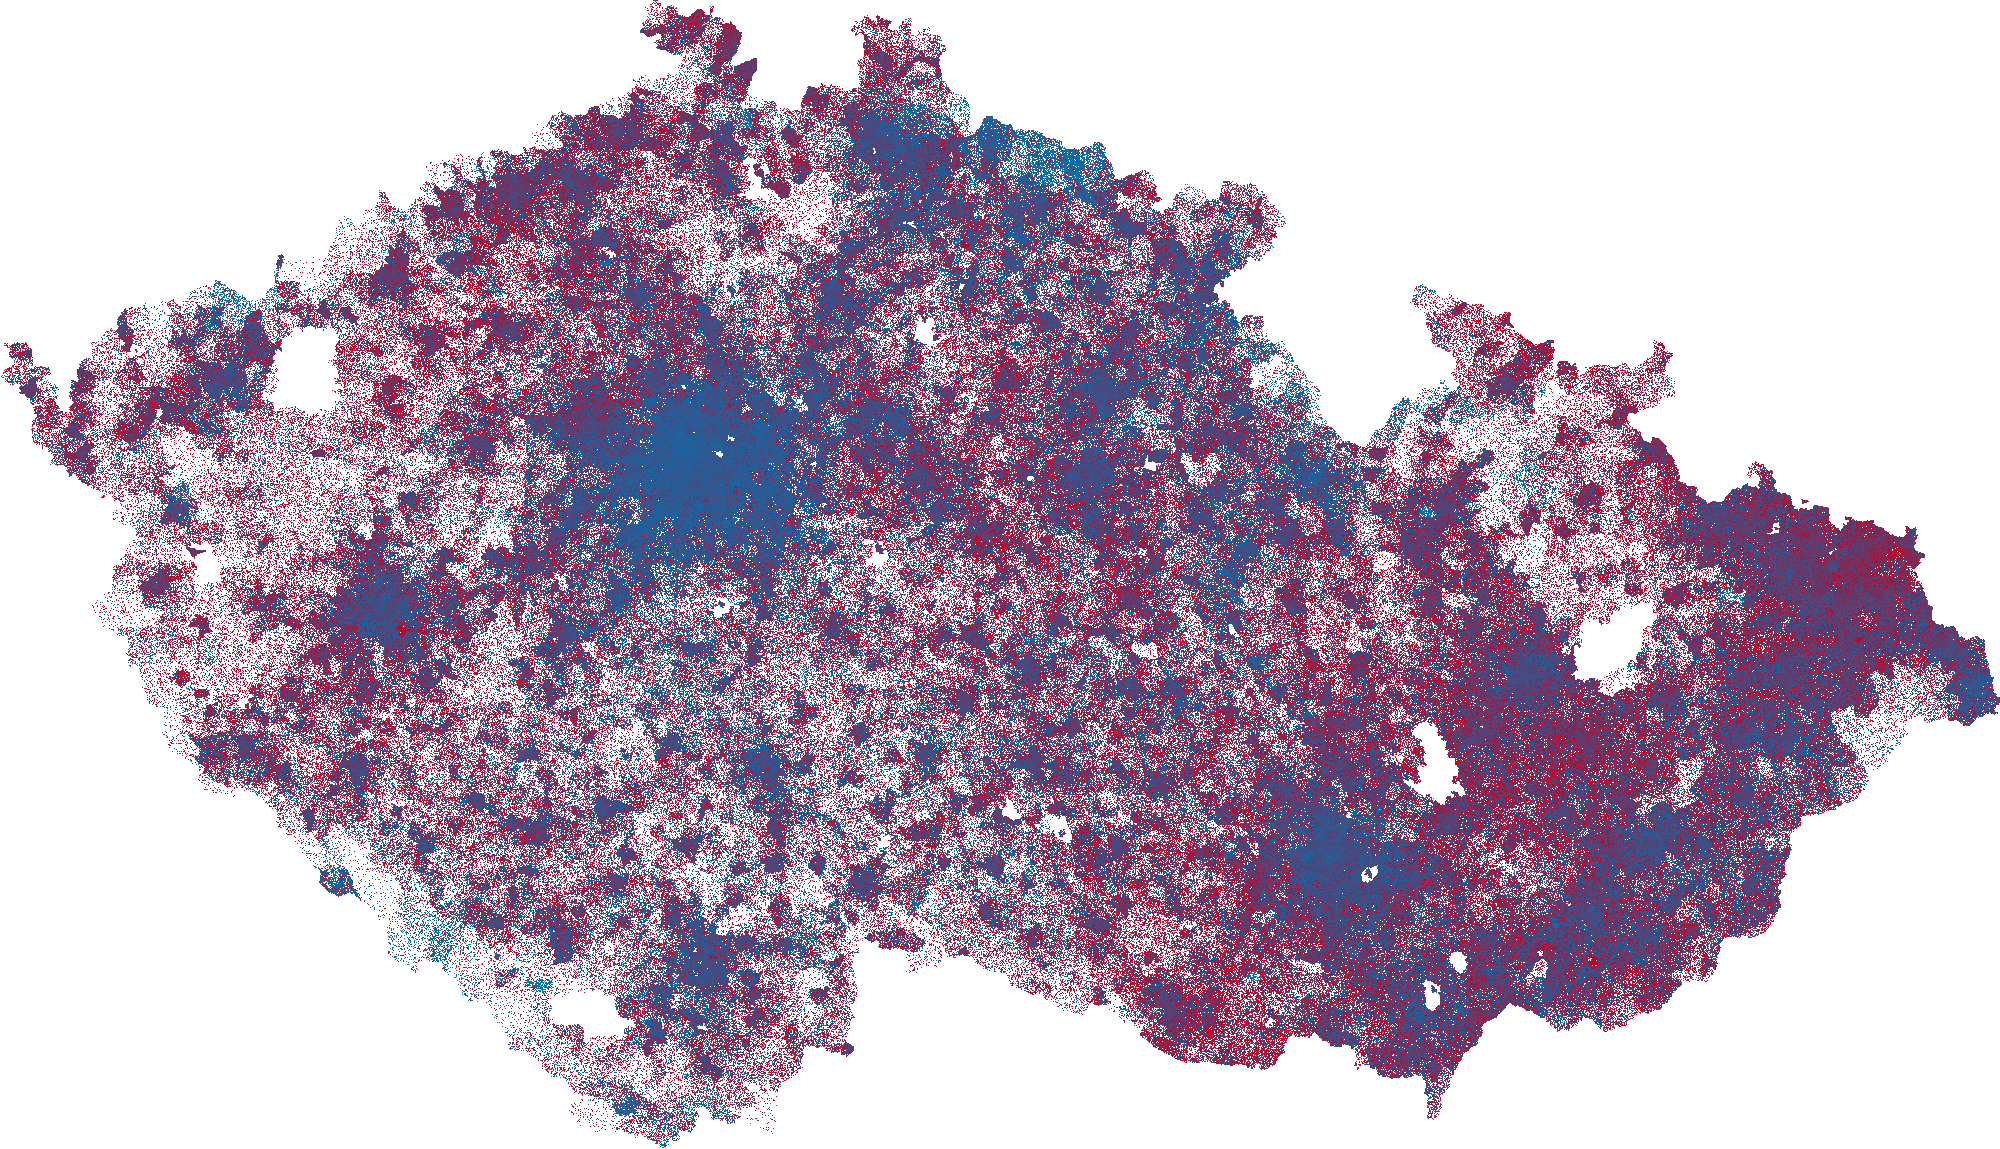

In [15]:
ds.utils.export_image(img, 'map')

In [16]:
background = Image.open('map.png')
foreground = Image.open('lab.png')

Image.alpha_composite(background, foreground).save("out.png")